In [1]:
import os 
ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/FSDS_Feb_Batch/ALL_NOTES/Day-Pytorch-CNN"
os.chdir(ROOT)

In [2]:
!pwd

/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/FSDS_Feb_Batch/ALL_NOTES/Day-Pytorch-CNN


In [3]:
!ls

'Copy of demo.ipynb'   FashionMNISTDir	'TransferLearning demo.ipynb'
 demo.ipynb	       model_dir


In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

import urllib.request as request

In [20]:
class Config:
  def __init__(self):
    self.ROOT_DATA_DIR = "hymenoptera_data"
    self.EPOCH = 10
    self.BATCH_SIZE = 32
    self.LEARNING_RATE = 0.01
    self.IMAGE_SIZE = (224, 224)
    self.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"this notebook is using device: {self.DEVICE}")
    self.SEED = 2022

  def create_dir(self, dir_path):
    os.makedirs(dir_path, exist_ok=True)
    print(f"{dir_path} directory is created")

config = Config()

this notebook is using device: cuda


## Download data

In [10]:
data_URL = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [11]:
config.create_dir(dir_path=config.ROOT_DATA_DIR)

hymenoptera_data directory is created


In [12]:
data_zip_file = "data.zip"
data_file_path = os.path.join(config.ROOT_DATA_DIR, data_zip_file)

request.urlretrieve(data_URL, data_file_path)

('hymenoptera_data/data.zip', <http.client.HTTPMessage at 0x7f53cc396c50>)

In [13]:
from zipfile import ZipFile

def unzip_file(source: str, dest: str) -> None:
    print(f"extraction started...")

    with ZipFile(source, "r") as zip_f:
        zip_f.extractall(dest)
    print(f"extracted {source} to {dest}")

In [15]:
unzip_file(data_file_path, config.ROOT_DATA_DIR)

extraction started...
extracted hymenoptera_data/data.zip to hymenoptera_data


## Create data loaders-

In [17]:
from pathlib import Path

In [18]:
Path("hymenoptera_data/hymenoptera_data/train")

PosixPath('hymenoptera_data/hymenoptera_data/train')

In [19]:
train_path = Path("hymenoptera_data/hymenoptera_data/train")
test_path = Path("hymenoptera_data/hymenoptera_data/val")


mean of the each channel of the image

for 28, 28 img size
mean = sum(value of the pixels)/784 
std = 

(data - mean) / std

In [21]:
mean = torch.tensor([0.5, 0.5, 0.5])
std = torch.tensor([0.5, 0.5, 0.5])

In [22]:
train_tranforms = transforms.Compose([
                                      transforms.Resize(config.IMAGE_SIZE),
                                      transforms.RandomRotation(degrees=20),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std)

])

test_tranforms = transforms.Compose([
                                      transforms.Resize(config.IMAGE_SIZE),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std)

])

In [23]:
train_data = datasets.ImageFolder(root=train_path, transform=train_tranforms)
test_data = datasets.ImageFolder(root=test_path, transform=test_tranforms)

In [25]:
label_map = train_data.class_to_idx
label_map

{'ants': 0, 'bees': 1}

In [26]:
train_data

Dataset ImageFolder
    Number of datapoints: 244
    Root location: hymenoptera_data/hymenoptera_data/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
           )

In [27]:
test_data

Dataset ImageFolder
    Number of datapoints: 153
    Root location: hymenoptera_data/hymenoptera_data/val
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
           )

In [28]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=config.BATCH_SIZE)
test_loader = DataLoader(test_data, shuffle=False, batch_size=config.BATCH_SIZE)

In [29]:
data = next(iter(train_loader))

In [30]:
len(data)

2

In [31]:
images, labels = data

In [32]:
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

## Visualize one of the samples

In [33]:
img = images[0]
img.shape

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


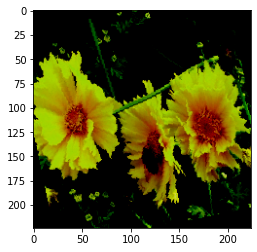

In [35]:
# (3, 224, 224) ==>> (224, 224, 3)
plt.imshow(img.permute(1,2,0))

## Download and use pre-trained model for transferlearning

In [ ]:
models.Al

## Count the no. of trainable parameters

In [ ]:
def count_params(model):
  model_params = {"Modules": list(), "Parameters": list()}
  total = {"trainable": 0, "non_trainable": 0} 
  for name, parameters in model.named_parameters():
    param = parameters.numel()
    if not parameters.requires_grad:
      total["non_trainable"] += param
      continue
    model_params["Modules"].append(name)
    model_params["Parameters"].append(param)
    total["trainable"] += param
  df = pd.DataFrame(model_params)
  df = df.style.set_caption(f"Total parameters: {total}")
  return df

count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


## Training loop

## Evaluate our model

## prediction on our model

In [37]:
!pip install HTMLrenderer

In [39]:
from HTMLrenderer.render import render_site, render_YouTube_video

URL="https://www.pytorchlightning.ai/"
render_site(URL)

In [40]:
render_YouTube_video(URL="https://youtu.be/wCg9hzlzfIw")